<h1>군집 분석</h1>

In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
sklearn.__version__

'1.6.1'

In [3]:
# 아이리스 데이터 셋
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# K평균 군집화

기본 군집화

In [4]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
from sklearn.cluster import KMeans
f = KMeans(n_clusters=3,random_state=0)
f.fit(X)

KMeans(n_clusters=3, random_state=0)

In [6]:
f.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [7]:
pd.crosstab(f.labels_,y)

col_0,0,1,2
row_0,,,
0,0,47,14
1,50,0,0
2,0,3,36


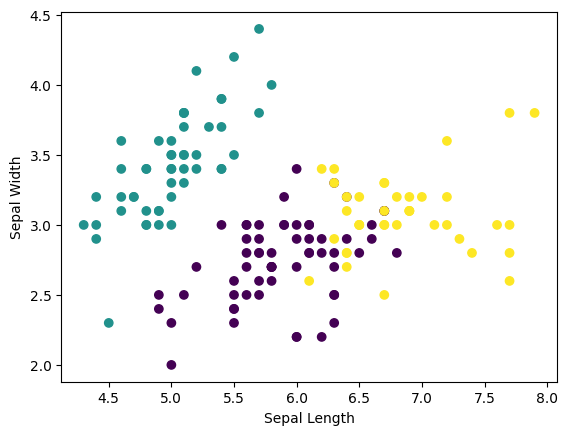

In [8]:
plt.scatter(X[:,0],X[:,1],c=f.labels_)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.show()

스케일 후 군집화

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xscaled = scaler.transform(X)

In [10]:
Xscaled[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [11]:
print(X.mean(axis=0), Xscaled.mean(axis=0) )

[5.84333333 3.05733333 3.758      1.19933333] [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [12]:
print(X.var(axis=0), Xscaled.var(axis=0) )

[0.68112222 0.18871289 3.09550267 0.57713289] [1. 1. 1. 1.]


In [13]:
f2 = KMeans(n_clusters=3,random_state=0)
f2.fit(Xscaled)
pd.crosstab(f2.labels_,y)

col_0,0,1,2
row_0,,,
0,0,39,14
1,50,0,0
2,0,11,36


In [14]:
pd.crosstab(f.labels_,f2.labels_)

col_0,0,1,2
row_0,,,
0,52,0,9
1,0,50,0
2,1,0,38


# 가우시안 혼합 모델

기본 군집화

In [15]:
from sklearn.mixture import GaussianMixture
f = GaussianMixture(n_components=3,random_state=0)
f.fit(X)

GaussianMixture(n_components=3, random_state=0)

In [16]:
f.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
pd.crosstab(f.predict(X),y)

col_0,0,1,2
row_0,,,
0,0,45,0
1,50,0,0
2,0,5,50


스케일링 후 군집화

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xscaled = scaler.transform(X)

In [19]:
f2 = GaussianMixture(n_components=3,random_state=0)
f2.fit(Xscaled)

GaussianMixture(n_components=3, random_state=0)

In [20]:
pd.crosstab(f2.predict(Xscaled),y)

col_0,0,1,2
row_0,,,
0,0,45,0
1,50,0,0
2,0,5,50


In [21]:
pd.crosstab(f.predict(X),f2.predict(Xscaled))

col_0,0,1,2
row_0,,,
0,45,0,0
1,0,50,0
2,0,0,55


# 계층적 군집화

기본 군집화

In [22]:
from sklearn.cluster import AgglomerativeClustering
f = AgglomerativeClustering(
    n_clusters=3,
    metric='euclidean',
    linkage='complete'
  )
f.fit(X)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [23]:
f.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
pd.crosstab(f.labels_,y)

col_0,0,1,2
row_0,,,
0,0,23,49
1,50,0,0
2,0,27,1


코싸인 유사도 이용

In [25]:
from sklearn.cluster import AgglomerativeClustering
f = AgglomerativeClustering(
    n_clusters=3,
    metric='cosine',
    linkage='complete'
  )
f.fit(X)

AgglomerativeClustering(linkage='complete', metric='cosine', n_clusters=3)

In [26]:
pd.crosstab(f.labels_,y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,50,24
2,0,0,26


코싸인 유사도 + Single Linkage

In [27]:
from sklearn.cluster import AgglomerativeClustering
f = AgglomerativeClustering(
    n_clusters=3,
    metric='cosine',
    linkage='single'
  )
f.fit(X)

AgglomerativeClustering(linkage='single', metric='cosine', n_clusters=3)

In [28]:
pd.crosstab(f.labels_,y)

col_0,0,1,2
row_0,,,
0,49,0,0
1,0,50,50
2,1,0,0


#연습 문제

1. 당뇨 데이터 셋을 K평균 군집화를 통해 5개의 군집으로 분류하시오. random_state는 42을 사용하시오. 데이터가 이미 스케일되어있기 때문에 따로 스케일할 필요는 없고, Y를 제외한 모든 변수를 사용한다. 각 군집은 몇 개의 데이터를 갖는가? 각 군집별로 Y의 평균을 측정하였을 때, 뚜렷한 차이가 보이는가?

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)

In [2]:
import pandas as pd
import numpy as np

n_clusters = 5
random_state = 42
f22 = KMeans(n_clusters=5, random_state=random_state)
f22.fit(X)

KmeanScaledCrosstab = pd.crosstab(f22.labels_, y).T

ClusterCounts = [sum(f22.labels_ == i) for i in range(n_clusters)]

print("각 군집의 데이터 갯수 [0/1/2/3/4] :", ClusterCounts)
print(np.max(ClusterCounts))
print(np.min(ClusterCounts))

각 군집의 데이터 갯수 [0/1/2/3/4] : [np.int64(91), np.int64(110), np.int64(72), np.int64(85), np.int64(84)]
110
72


In [3]:
Y_mean = np.empty((n_clusters))

for i in range(n_clusters):
  Y_mean[i] = y[f22.labels_ == i].mean()
  print(f'군집 {i} :', Y_mean[i])

군집 0 : 111.50549450549451
군집 1 : 157.72727272727272
군집 2 : 98.90277777777777
군집 3 : 196.88235294117646
군집 4 : 189.16666666666666


In [43]:
print(np.diff(sorted(Y_mean)))
print(Y_mean[0] - Y_mean[1], Y_mean[0] - Y_mean[2], Y_mean[1] - Y_mean[2])

print(f'가장 작은 차이의 평균 : {np.diff(sorted(Y_mean)).min():.2f}')
# 가장 작은 차이의 평균 : 35.92176906

[12.60271673 46.22177822 31.43939394  7.71568627]
-46.22177822177821 12.60271672771674 58.82449494949495
가장 작은 차이의 평균 : 7.72


In [4]:
196.88235294117646-98.90277777777777

97.97957516339869

In [44]:
MIN = np.inf
MAX = -np.inf
for x in Y_mean:
  for y in Y_mean:
    if x != y and MIN > np.abs(x-y):
      MIN = np.abs(x-y)

for x in Y_mean:
  for y in Y_mean:
    if x != y and MAX < np.abs(x-y):
      MAX = np.abs(x-y)

print(f'가장 작은 차이의 평균 : {MIN:.2f}')
print(f'가장 큰 차이의 평균 : {MAX:.2f}')

print('정렬 :', (sorted(Y_mean)))
print(f'가장 작은 차이의 평균 : {np.diff(sorted(Y_mean)).min():.2f}')
print(f'가장 큰 차이의 평균 : {np.abs(sorted(Y_mean)[-1] - sorted(Y_mean)[0]):.2f}')

가장 작은 차이의 평균 : 7.72
가장 큰 차이의 평균 : 97.98
정렬 : [np.float64(98.90277777777777), np.float64(111.50549450549451), np.float64(157.72727272727272), np.float64(189.16666666666666), np.float64(196.88235294117646)]
가장 작은 차이의 평균 : 7.72
가장 큰 차이의 평균 : 97.98
